In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import json
import os

In [5]:
root_path = "../../layer_results"

df = pd.DataFrame(columns=["Intervention Layer", "Cause/Iso/Disentangle Score", "Type", "Inference Method"])

for layer_idx in range(1, 33, 2):
    result = json.load(open(os.path.join(root_path, f"{layer_idx}.json")))
    for formal_name, inference_method in zip(
        ["Soft Intervention", "One-to-Many Intervention", "One-to-One Intervention"],
        ["default", "column_argmax", "bidding_argmax"] 
    ):
        cause_score = result[inference_method]["accs"]["causal"]
        iso_score = result[inference_method]["accs"]["isolate"]
        disentangle_score = result[inference_method]["accs"]["disentangle"]
        
        df.loc[len(df)] = [layer_idx, cause_score, "Cause", formal_name]
        df.loc[len(df)] = [layer_idx, iso_score, "Iso", formal_name]
        df.loc[len(df)] = [layer_idx, disentangle_score, "Disentangle", formal_name]

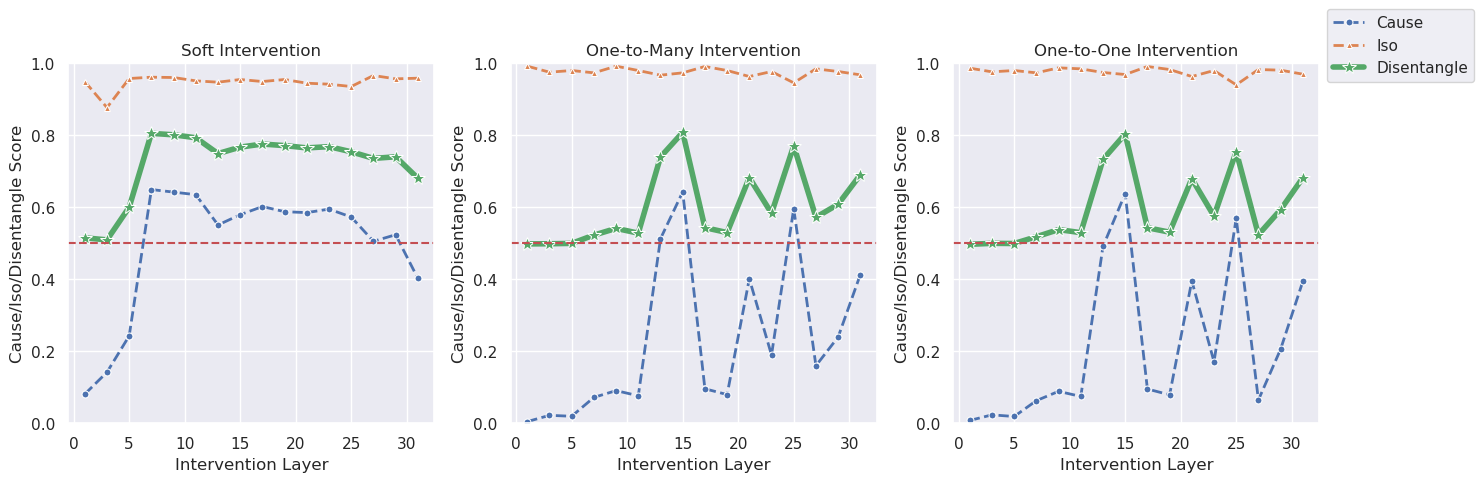

In [24]:
# Make three line plots side by side to show the Intervention Layer vs. Cause/Iso/Disentangle Score for each inference method, use different colors for each type
# Add different markers for each type
# move the legend to the right of the last plot and remove the title of the legend
import itertools


sns.set()
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

marker = itertools.cycle(['o', '^', '*', '8', 's', 'p', 'd', 'v'])
markers = [next(marker) for _ in range(3)]

for i, inference_method in enumerate(["Soft Intervention", "One-to-Many Intervention", "One-to-One Intervention"]):
    
    for j, (type_name, marker) in enumerate(zip(["Cause", "Iso", "Disentangle"], markers)):
        style = "solid" if type_name == "Disentangle" else "dashed"
        width = 4 if type_name == "Disentangle" else 2
        marker_size = 10 if type_name == "Disentangle" else 5
        df_subset = df[(df["Inference Method"] == inference_method) & (df["Type"] == type_name)]
        sns.lineplot(x="Intervention Layer", y="Cause/Iso/Disentangle Score", data=df_subset, 
                     ax=axes[i], label=type_name, marker=marker, linestyle=style, linewidth=width, markersize=marker_size)
    axes[i].set_title(inference_method)
    axes[i].set_ylim(0, 1)
    axes[i].set_xlabel("Intervention Layer")
    axes[i].set_ylabel("Cause/Iso/Disentangle Score")
    
    # Draw a horizontal line at y=0.5 for each plot
    axes[i].axhline(y=0.5, color='r', linestyle='--')
    

# Move the legend to the up right of the last plot and remove the title of the legend
axes[2].legend(loc='upper right', title=None)

# Remove the legend in the first two plots
axes[0].get_legend().remove()
axes[1].get_legend().remove()
    
plt.tight_layout()

plt.savefig("layer_results.pdf")